In [37]:
%load_ext nb_black
import sys

sys.path.append("/Users/vikaspandey/my_projects/deeplearning_ai")
import os
import pandas as pd
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from data_visualisation.plot import Plot

weights_file = (
    "../../../../datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
)

train_dataset_basepath = (
    "../../../../datasets/cats_and_dogs_filtered/cats_and_dogs_filtered/train/"
)
validation_dataset_basepath = (
    "../../../../datasets/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/"
)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [12]:
pre_trained_model = InceptionV3(
    input_shape=(150, 150, 3), include_top=False, weights=None
)
pre_trained_model.load_weights(weights_file)
for layer in pre_trained_model.layers:
    layer.trainable = False
last_layer = pre_trained_model.get_layer("mixed7")
print("The shape of last layer is ", last_layer.output_shape)
last_layer_output = last_layer.output

The shape of last layer is  (None, 7, 7, 768)


<IPython.core.display.Javascript object>

In [22]:
x = layers.Flatten()(last_layer_output)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation="sigmoid")(x)
model = Model(pre_trained_model.input, x)
model.compile(
    optimizer=RMSprop(lr=0.0001), loss="binary_crossentropy", metrics=["accuracy"]
)

<IPython.core.display.Javascript object>

In [30]:
train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
train_generator = train_datagen.flow_from_directory(
    train_dataset_basepath, target_size=(150, 150), batch_size=20, class_mode="binary"
)

validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
validation_generator = validation_datagen.flow_from_directory(
    validation_dataset_basepath,
    target_size=(150, 150),
    batch_size=10,
    class_mode="binary",
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


<IPython.core.display.Javascript object>

In [31]:
history = model.fit(
    train_generator,
    epochs=15,
    steps_per_epoch=100,
    validation_data=validation_generator,
    validation_steps=100,
)

Epoch 1/15
100/100 [==============================] - 119s 1s/step - loss: 0.2153 - accuracy: 0.9215 - val_loss: 0.1270 - val_accuracy: 0.9550
Epoch 2/15
100/100 [==============================] - 115s 1s/step - loss: 0.0321 - accuracy: 0.9890 - val_loss: 0.1806 - val_accuracy: 0.9480
Epoch 3/15
100/100 [==============================] - 104s 1s/step - loss: 0.0109 - accuracy: 0.9965 - val_loss: 0.1565 - val_accuracy: 0.9650
Epoch 4/15
100/100 [==============================] - 121s 1s/step - loss: 0.0021 - accuracy: 0.9990 - val_loss: 0.1852 - val_accuracy: 0.9630
Epoch 5/15
100/100 [==============================] - 117s 1s/step - loss: 0.0024 - accuracy: 0.9990 - val_loss: 0.2045 - val_accuracy: 0.9610
Epoch 6/15
100/100 [==============================] - 99s 992ms/step - loss: 9.4157e-05 - accuracy: 1.0000 - val_loss: 0.2356 - val_accuracy: 0.9610
Epoch 7/15
100/100 [==============================] - 101s 1s/step - loss: 4.2095e-05 - accuracy: 1.0000 - val_loss: 0.2550 - val_accura

<IPython.core.display.Javascript object>

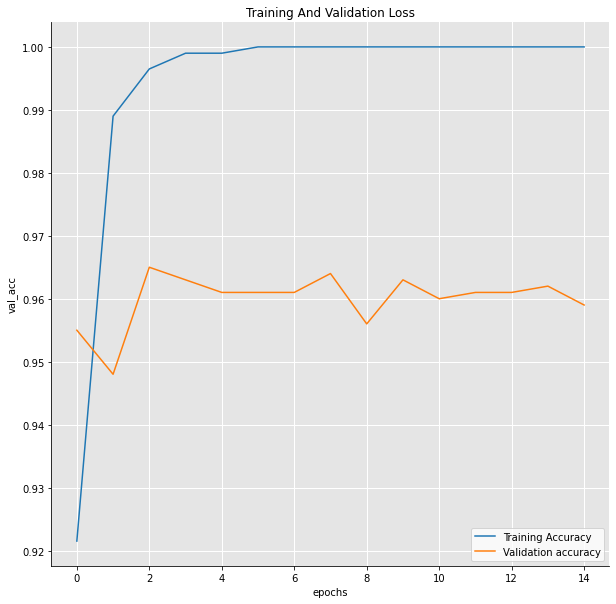

<IPython.core.display.Javascript object>

In [41]:
history_data = history.history
train_acc = history_data["accuracy"]
val_acc = history_data["val_accuracy"]
train_loss = history_data["loss"]
val_loss = history_data["val_loss"]
df = pd.DataFrame(
    {"epochs": range(len(train_acc)), "val_acc": val_acc, "train_acc": train_acc}
)
p2 = Plot(df)
p2.plot_bulk(
    [
        {
            "type": "line",
            "params": (
                "epochs",
                "train_acc",
                {
                    "axes_settings": {"title": "Training And Validation Loss",},
                    "label": "Training Accuracy",
                    "legend": "brief",
                },
            ),
        },
        {
            "type": "line",
            "params": (
                "epochs",
                "val_acc",
                {
                    "axes_settings": {"title": "Training And Validation Loss",},
                    "label": "Validation accuracy",
                    "legend": "brief",
                },
            ),
        },
    ],
    single_axes=True,
)

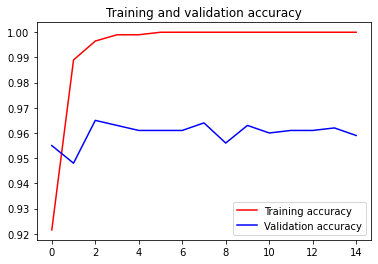

<Figure size 432x288 with 0 Axes>

<IPython.core.display.Javascript object>

In [42]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "r", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend(loc=0)
plt.figure()


plt.show()